[**1. What is Machine Learning**](#ML) <br>



[**2. Supervised learning**](#sl) <br>

[2.1 Introduction](#intro)<br>
&nbsp; &nbsp;   [Training and testing](#train) <br>
&nbsp; &nbsp;&nbsp; &nbsp; [Hypothesis](#hypo) <br>
&nbsp; &nbsp;&nbsp; &nbsp; [Objective function](#obj) <br>
&nbsp; &nbsp;&nbsp; &nbsp; [Update function](#update) <br>
&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; [(Batch) Gradient Descent](#GD)<br>
&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; [Stochastic (or on-line) Gradient Descent](#SGD)<br>
&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; [Improvements](#adam)<br>
&nbsp; &nbsp;&nbsp; &nbsp;&nbsp; &nbsp; [Note](#note)<br>
&nbsp; &nbsp;   [Predicting](#predict)  <br>
&nbsp; &nbsp;   [Scoring](#score)  <br>

[**2.2 Regression**](#regr) <br>
&nbsp; &nbsp; [Linear regression](#lr) <br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;[Ordinary Least Squares](#ols) <br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;[Note: Correlated features](#corr)<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;[Ridge Regression](#ridge)<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;[Lasso](#lasso)<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;[Elastic Net](#EN)<br>
&nbsp; &nbsp; [Decision Tree Regression](#tree) <br>
&nbsp; &nbsp; [Random Forest Regression](#RF) <br>
&nbsp; &nbsp; [Note: Bias-variance decomposition](#bias-variance) <br>



 <br>
 
[**2.3 Classification**](#class) <br>
 <br>
[**3. Note: The curse of dimensionality**](#curse) <br>
<br>
[**4. Unsupervised learning**](#ul)<br>
<br><br>

# 1. What is Machine Learning?<a name="ML"></a>

Machine Learning is about building programs with tunable parameters that are adjusted automatically so as to improve their behavior by adapting to previously seen data.

Machines learn to behave more intelligently by somehow **generalizing** rather that just storing and retrieving data items like a database system would do. During learning the machine considers a set of $n$ or <tt>n_samples</tt> samples of data and then tries to predict properties of unknown data. A sample can consist of a single number (or feature or attribute) or a multi-dimensional entry (aka multivariate data) or feature or attribute:let $p$ or <tt>n_features</tt> be the dimensionality of the set of features corresponding to a sample.

Learning problems fall into a few categories:

* **unsupervised learning**, in which the training data consists of a set of input vectors $x$ without any corresponding target values. The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization.

* **supervised learning**, we have a dataset consisting of both **features and labels**, the task is to construct an estimator which is able to predict the label of an object (**or target**) given the set of features. 
    
    This problem can be either:
    * **regression**: if the desired output consists of one or more continuous variables (**the label is continuous**), then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.
    * **classification**: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data (**the label is discrete**). An example of a classification problem would be handwritten digit recognition, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the $n$ samples provided, one is to try to label them with the correct category or class. A relatively simple example is predicting the species of iris given a set of measurements of its flower.
    

[![](ML.png) ](ML.png)


We will use an open source machine learning library called scikit learn in python. 

# 2. Supervised learning <a name="sl"></a>

Below some figures representing popular supervised algorithms.
[![](ML_amoroso.png) ](ML_amoroso.png)

Each model type has a different way of applying rules to known data to predict
unknown data. Decision trees create a set of rules in the form of a tree structure and
linear models create a set of parameters to represent the input data.
Neural networks have what is called a parameter vector representing the weights on
the connections between the nodes in the network. We’ll describe the details of these
types of models later on.


## 2.1 Introduction <a name="intro"></a>

### Training and testing <a name="train"></a>

Machine learning is about learning some properties of a data set and then testing those properties against another data set. A common practice in machine learning is to evaluate an algorithm by splitting a data set into two. We call one of those sets the training set, on which we learn some properties; we call the other set the testing set, on which we test the learned properties.

[![](model_amoroso.png) ](model_amoroso.png)

<ul>
    <li>We make a <b>hypothesis</b> about the data and we explore the model parameters. To find good values for parameters, we can use tools such as *grid search and cross validation*.
It’s important to note that in machine learning, the terms “hypothesis” and “model” are sometimes used interchangeably. However, a hypothesis represents an assumption, while a model is a mathematical representation employed to test that hypothesis. <img style='vertical-align:middle;' src="CV.png" width="600"></li>

<li>We choose an <b>objective function</b>, a function that we optimize during training. We will denote it with $Q$:

$argmin_w Q(w)=min_w {\frac {1}{n}}\sum _{i=1}^{n}Q_{i}(w)$

where $i$ is the observation, $w$ is the parameter.</li>


<li>We choose an <b>update function</b>:
<ul>
<li><b>(Batch) Gradient Descent</b>
$w:=w-\eta \,\nabla Q(w)=w-{\frac {\eta }{n}}\sum _{i=1}^{n}\nabla Q_{i}(w)$

where $\eta$ is the <b>learning rate</b> or step size

inexpensive evaluation for one-parameter exponential families allow economical function-evaluations and gradient-evaluations. 
</li>
<li><b>Stochastic (or on-line) Gradient Descent</b>

*When the training set is enormous and no simple formulas exist, evaluating the sums of gradients becomes very expensive, because evaluating the gradient requires evaluating all the summand functions' gradients. To economize on the computational cost at every iteration, stochastic gradient descent samples a subset of summand functions at every step. This is very effective in the case of large-scale machine learning problems.*
    
In stochastic (or "on-line") gradient descent, the true gradient of 
        
$Q(w)$ is approximated by a gradient at a single sample:
        
$w:=w-\eta \,\nabla Q_{i}(w)$
</li>
<li>Improvements 
<ul>
    <li>
<b>Stochastic gradient descent with momentum (the heavy ball method)</b> 
        
remembers the update Δw at each iteration, and determines the next update as a linear combination of the gradient and the previous update:
        
$\Delta w:=\alpha \Delta w-\eta \,\nabla Q_{i}(w)$<br>
        
$w:=w+\Delta w$ that leads to:<br>
        
$w:=w-\eta \,\nabla Q_{i}(w)+\alpha \Delta w$<br>

where the parameter $w$ which minimizes $Q(w)$ is to be estimated, $\eta$ is a step size (sometimes called the learning rate in machine learning) and $\alpha$ is an exponential decay factor between 0 and 1 that determines the relative contribution of the current gradient and earlier gradients to the weight change.

The name momentum stems from an analogy to momentum in physics: the weight vector $w$, thought of as a particle traveling through parameter space, incurs acceleration from the gradient of the loss ("force"). Unlike in classical stochastic gradient descent, **it tends to keep traveling in the same direction, preventing oscillations**. Momentum has been used successfully by computer scientists in the training of artificial neural networks for several decades. 
</li>
<li> <b>Adam or Adaptive Moment Estimation</b>
    
$w^{(t+1)} = f(w^{(t)})$
    
Adam does not converge for all convex objectives. Despite this, Adam continues to be used in        practice due to its strong performance in practice.
</li>
    </ul>
<li>Note 
    
For OLS there is an analytical expression for the global minimum.
</li>
</ul>
</li>
</ul>

### Predicting <a name="predict"></a>
By drawing a separating line in classification or a regression line, we have learned a model which can generalize to new data: if you were to drop another point onto the plane which is unlabeled, this algorithm could now predict it's value.

* <tt> model.predict()</tt> : given a trained model, predict the label of a new set of data. This method accepts one argument, the new data $X_{new}$ (e.g. <tt> model.predict(X_new)</tt>), and returns the learned label for each object in the array.
* <tt> model.predict_proba()</tt> : For classification problems, some estimators also provide this method, which returns the probability that a new observation has each categorical label. In this case, the label with the highest probability is returned by model.predict().


### Scoring   <a name="score"></a>
Defining model evaluation rules:
* <tt>model.score()</tt> : for classification or regression problems, most (all?) estimators implement a score method. Scores are between 0 and 1, with a larger score indicating a better fit.

functions ending with _score return a value to maximize, the higher the better.

functions ending with _error, _loss, or _deviance return a value to minimize, the lower the better.

**Learning curve**: training score and testing score for different number of training samples show the effect of adding more samples during the training process.

**Validation curve**: training scores and validation scores for different values of the parameters.

**Cross Validation**:
<img style='vertical-align:middle;' src="5-fold.png" width="600">
https://scikit-learn.org/stable/modules/model_evaluation.html




## 2.2 Regression <a name="regr"></a>
&nbsp; &nbsp; [Linear regression](#lr) <br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;[Ordinary Least Squares](#ols) <br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;[Note: Correlated features](#corr)<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;[Ridge](#Ridge) <br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;[Lasso](#Lasso) <br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;[Elastic Net](#ols) <br>

&nbsp; &nbsp; [Decision Tree Regression](#tree) <br>
&nbsp; &nbsp; [Random Forest Regression](#RF) <br>
&nbsp; &nbsp; [Note: Bias-variance decomposition](#bias-variance) <br>
### Linear regression <a name="lr"></a>
The following are a set of methods intended for **linear** regression: the target value is expected to be a linear combination of the features. 

In mathematical notation, if $\hat{y}$ is the predicted value


$\hat{y}(w,x)=w_0+w_1x_1+...+w_px_p$.


In scikit learn the vector $w=(w_1,...,w_p)$ 
 is designated as <tt>coef_</tt> and $w_0$ as <tt>intercept_</tt>.
#### Ordinary Least Squares <a name="ols"></a>
LinearRegression fits a linear model with coefficients $w=(w_1,...,w_p)$
 to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Mathematically it solves a problem of the form:
 
$argmin_w Q_w= argmin_w \Vert y-Xw\Vert^2_2$
 
The objective function is the l2 measure.

In [1]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
reg.coef_

array([0.5, 0.5])

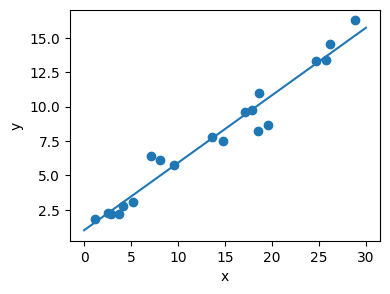

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# x from 0 to 30
x = 30 * np.random.random((20, 1))

# y = a*x + b with noise
y = 0.5 * x + 1.0 + np.random.normal(size=x.shape)

# create a linear regression model
model = LinearRegression()
model.fit(x, y)

# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)#, "o:r") #the line is the set of predicted values given x_new

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')


plt.show()

The least squares solution is computed using the singular value decomposition of $X$. If $X$ is a matrix of shape (<tt>n_samples</tt>, <tt>n_features</tt>) or ($n$,$p$) this method has a cost of $O($<tt>n_samples</tt> <tt>n_features</tt>$^2)$, assuming that <tt>n_samples</tt>$\ge$ <tt>n_features</tt> or $O(np^2)$.

Note: Explanation

<small>In linear regression you have to solve $(X'X)^{−1}X'y$ where $X$ is a $n \times p$ matrix. Now, in general the complexity of the matrix product $AB$ is $O(abc)$ whenever $A$
 is $a\times b$
 and $B$
 is $b \times c$. Therefore we can evaluate the following complexities:

* the matrix product $X'X$ 
 with complexity $O(p^2n)$

* the matrix-vector product $X'y$ 
 with complexity $O(pn)$

* the inverse $(X'X)-1$
 with complexity $O(p^3)$ 

Therefore the complexity is $O(np^2+p^3)$. </small>

This is an example of fitting a model to data, but our focus here is that the model can make **generalizations** about new data. The model has been learned from the training data, and can be used to predict the result of test data: here, we might be given an $x$-value, and the model would allow us to predict the $y$ value.

#### Note: Correlated Features <a name="corr"></a>

<span style="color:red">The coefficient estimates for Ordinary Least Squares rely on the independence of the features. **When features are correlated** and the columns of the design matrix have an approximately linear dependence, the design matrix becomes close to singular and as a result, **the least-squares estimate becomes highly sensitive to random errors in the observed target, producing a large variance**. This situation of multicollinearity can arise, for example, when data are collected without an experimental design.

There are preprocessing strategies to tackle this issue, we will see more in the coming material. </span>

#### Ridge Regression <a name="ridge"></a>
$argmin_w Q_w= argmin_w \Vert y-Xw\Vert^2_2 +\alpha \Vert w \Vert_2^2$
a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm

Imposes a penalty on the size of the coefficients. The complexity parameter $\alpha$ controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

Promotes smaller coefficients (i.e. no one coefficient should be too large)

#### Lasso <a name="lasso"></a>
$argmin_w Q_w= argmin_w \Vert y-Xw\Vert^2_2 +\alpha \Vert w \Vert _1$

Promotes sparsity of coefficients. This can be seen as a form of feature selection.

#### Elastic Net <a name="EN"></a>
$argmin_w Q_w= argmin_w \Vert y-Xw\Vert^2_2 +\alpha_2 \Vert w \Vert_2^2 + \alpha_1 \Vert w \Vert _1$ 

[![](prior.png) ](prior.png)

Bayesian interpretation of Ridge and Lasso penalty. Left: Ridge regression is the posterior mode for $\alpha$ under a Gaussian prior. Right: The lasso is the posterior mode for $\alpha$ under a double-exponential prior ($\beta$ in the image should be replaced by $\alpha$ in our notation)

**Note: Standardization**

<span style="color:red">Feature scaling through standardization, also called Z-score normalization, is an important preprocessing step for many machine learning algorithms. It involves rescaling each feature such that it has a standard deviation of 1 and a mean of 0.</span>

<span style="color:red">Even if tree based models are (almost) not affected by scaling, many other algorithms require features to be normalized, often for different reasons: **to ease the convergence** (such as a non-penalized logistic regression), to create a completely different model fit compared to the fit with unscaled data (such as KNeighbors models).</span> 

<span style="color:red">Principal Component Analysis (PCA) is impacted by normalization of features. </span>

<span style="color:red">Coefficients must be scaled to the same unit of measure **to retrieve feature importance**, or **compare** them.</span>



### Decision Tree Regression<a name="tree"></a>
A decision tree recursively partitions the feature space such that the samples with the same labels or similar target values are grouped together.


$\theta=(j,t_m)$= a candidate split where $j$ is a feature and $t_m$ is a threshold<br>
$D_m$= the data at node $m$: it consists of $n_m$ samples<br>

The candidate split partitions the data into a left and a right partition:<br>
$D_m^{\text{left}}(\theta)$=left partition given $\theta=(j,t_m)$={$(x,y)|x_j\leq t_m$}

The **objective function** at each node $m$ is defined as (notice that the parameters of the model are denoted as $\theta$):

$argmin_w Q_w (m)= argmin_{\theta} \{\frac{n_m^{\text left}}{n_m} L(D_m^{\text left}(\theta)) + \frac{n_m^{\text right}}{n_m} L(D_m^{\text right}(\theta))\}$

where $L$ is the loss function and depends on the task being solved (classification or regression).

Recurse for subsets $D_m^{\text{left}}(\theta^*)$ and $D_m^{\text{right}}(\theta^*)$ <span style="color:red">until the maximum allowable depth is reached, $n_m<min_{\text samples}$ or $n_m=1$.</span>

$L(D_m)=$
* mean squared error loss $= \frac{1}{n_m} \sum_{y\in D_m} (y- {\bar y}_m)^2$ with ${\bar y}_m=\frac{1}{n_m}\sum_{y\in D_m}y$
* mean poisson deviance $\frac{2}{n_m}\sum_{y\in D_m}(y \log \frac{1}{\bar y_m}-y+\bar y_m)$ 
    $y\ge0$; this loss might be a good choice if your target is a count or a frequency
* mean absolute error $=\frac{1}{n_m}\sum_{y\in D_m} |y-median(y)_m|$

#### Example:

A 1D regression with decision tree. The decision tree is used to fit a sine curve with additional noisy observation. As a result, it learns local linear regressions approximating the sine curve.


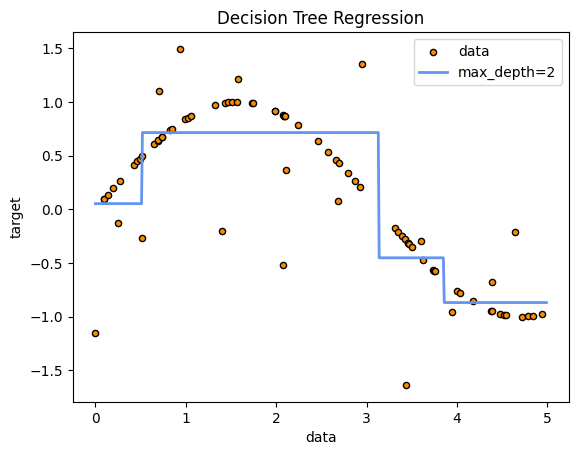

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import tree

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
#plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

[Text(0.5, 0.8333333333333334, 'x[0] <= 3.133\nsquared_error = 0.547\nsamples = 100.0%\nvalue = 0.122'),
 Text(0.25, 0.5, 'x[0] <= 0.514\nsquared_error = 0.231\nsamples = 63.8%\nvalue = 0.571'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.192\nsamples = 13.8%\nvalue = 0.052'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.148\nsamples = 50.0%\nvalue = 0.714'),
 Text(0.75, 0.5, 'x[0] <= 3.85\nsquared_error = 0.124\nsamples = 36.2%\nvalue = -0.667'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.124\nsamples = 17.5%\nvalue = -0.452'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.041\nsamples = 18.8%\nvalue = -0.869')]

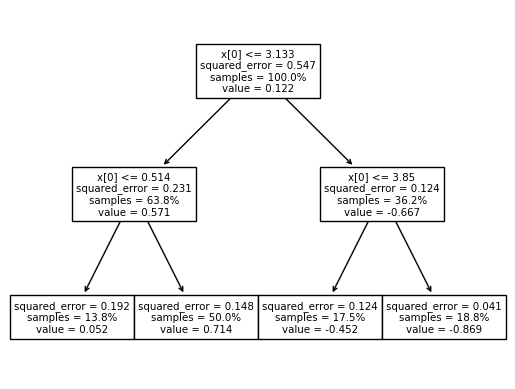

In [4]:
tree.plot_tree(regr_1,proportion=True)

<span style="color:red">We can see that if the maximum depth of the tree (controlled by the <tt>max_depth</tt> parameter) is set too high, the decision trees learn too fine details of the training data and learn from the noise, i.e. they overfit.</span>

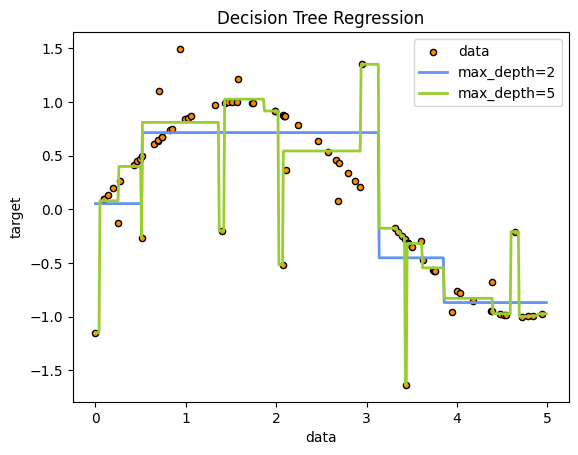

In [5]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

#### Complexity
One way to build a decision tree would be, at each point, to do something like this:

* For each possible feature to split on:
    * Find the best possible split for that feature. <br>
    * Determine the "goodness" of this fit.
* Of all the options tried above, take the best and use that for the split.

If you have continuous data, a common technique for finding the best possible split would be to sort the data into ascending order along that data point, then consider all possible partition points between those data points and taking the one that minimizes the objective function. This sorting step takes time $O(n_{samples} log (n_{samples}))$. Since we're doing that for each of the $O(n_{features})$ features, the runtime ends up working out to $O(n_{samples} n_{features} log(n_{samples}))$ total work done per node leading to a total cost ove*r the entire trees (by summing the cost at each node) of $O(n^2_{samples} n_{features} log(n_{samples}))$ or $O(n^2 p ~log(n))$.

In general (for balanced binary tree).

#### Advantages and disadvantages
Some advantages of decision trees are:

* Simple to understand and to interpret. Trees can be visualized.

* Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Some tree and algorithm combinations support missing values.


* Able to handle both numerical and categorical data. However, the scikit-learn implementation does not support categorical variables for now. Other techniques are usually specialized in analyzing datasets that have only one type of variable. See algorithms for more information.

* Able to handle multi-output problems.

* Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.

* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

The disadvantages of decision trees include:

* Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

* Predictions of decision trees are neither smooth nor continuous, but piecewise constant approximations as seen in the above figure. Therefore, they are not good at extrapolation.

* The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.

* There are concepts that are hard to learn because decision trees do not express them easily.

* Decision tree learners create **biased** trees if some classes dominate. It is therefore recommended to **balance** the dataset prior to fitting with the decision tree.


There are several ways to address the risk of overfitting:

* **Dimensionality reduction** improves the feature-to-sample ratio by representing the existing features with fewer, more informative, and less noisy features.
* **Ensemble models**, such as random forests, combine multiple trees while randomizing the tree construction.
* Decision trees provide several **regularization hyperparameters** to limit the growth of a tree and the associated complexity. While every split increases the number of nodes, it also reduces the number of samples available per node to support a prediction. For each additional level, twice the number of samples is needed to populate the new nodes with the same sample density.
* **Tree-pruning** is an additional tool to reduce the complexity of a tree by eliminating nodes or entire parts of a tree that add little value but increase the model's variance. Cost-complexity-pruning, for instance, starts with a large tree and recursively reduces its size by replacing nodes with leaves, essentially running the tree construction in reverse. The various steps produce a sequence of trees that can then be compared using cross-validation to select the ideal size.

### Ensemble methods: Random Forest Regression<a name="RF"></a>

Ensemble methods combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.



A random forest is a meta estimator that fits a number of decision tree regressors on various <span style="color:red">sub-samples</span> of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 


When splitting each node during the construction of a tree, the best split is found through an exhaustive search of the features values of either all input features or <span style="color:red">a random subset of size max_features</span>. 

The purpose of these <span style="color:red">two sources of randomness</span> is to decrease the variance of the forest estimator. Indeed, individual decision trees typically exhibit high variance and tend to overfit. The injected randomness in forests yield decision trees with somewhat decoupled prediction errors. By taking an average of those predictions, some errors can cancel out. <span style="color:red">Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias.</span> In practice the variance reduction is often significant hence yielding an overall better model.

In contrast to the original publication the scikit-learn implementation combines classifiers by averaging their probabilistic prediction, instead of letting each classifier vote for a single class.

<span style="color:red">The main parameters to adjust when using these methods is n_estimators and max_features. The former is the number of trees in the forest. The larger the better, but also the longer it will take to compute. In addition, note that results will stop getting significantly better beyond a critical number of trees. The latter is the size of the random subsets of features to consider when splitting a node. The lower the greater the reduction of variance, but also the greater the increase in bias.</span> Empirical good default values are max_features=1.0 or equivalently max_features=None (always considering all features instead of a random subset) for regression problems, and max_features="sqrt" (using a random subset of size sqrt(n_features)) for classification tasks (where n_features is the number of features in the data). The default value of max_features=1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values (e.g. 0.3 is a typical default in the literature). Good results are often achieved when setting max_depth=None in combination with min_samples_split=2 (i.e., when fully developing the trees)=The minimum number of samples required to split an internal node. Bear in mind though that these values are usually not optimal, and might result in models that consume a lot of RAM. The best parameter values should always be cross-validated. In addition, note that in random forests, bootstrap samples are used by default (bootstrap=True). When using bootstrap sampling the generalization error can be estimated on the left out or out-of-bag samples. This can be enabled by setting oob_score=True.



Less used parameters: The sub-sample size is controlled with the <tt>max_samples</tt> parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

### Parallelization
If <tt>n_jobs=-1</tt> then all cores available on the machine are used. 

### Note: Bias-variance decomposition <a name="bias-variance"></a>
[![](bias_variance.png) ](bias_variance.png)

The example below illustrates and compares the bias-variance decomposition of the expected mean squared error of a single estimator against a bagging ensemble.

In regression, the expected mean squared error of an estimator can be decomposed in terms of **bias**, **variance** and **noise**. On average over datasets of the regression problem, the bias term measures the average amount by which the predictions of the estimator differ from the predictions of the best possible estimator for the problem (i.e., the Bayes model). The variance term measures the variability of the predictions of the estimator when fit over different random instances of the same problem. Each problem instance is noted “LS”, for “Learning Sample”, in the following. Finally, the noise measures the irreducible part of the error which is due the variability in the data.

The upper left figure illustrates the predictions (in dark red) of a single decision tree trained over a random dataset LS (the blue dots) of a toy 1d regression problem. It also illustrates the predictions (in light red) of other single decision trees trained over other (and different) randomly drawn instances LS of the problem. Intuitively, the variance term here corresponds to the width of the beam of predictions (in light red) of the individual estimators. The larger the variance, the more sensitive are the predictions for $x$ to small changes in the training set. The bias term corresponds to the difference between the average prediction of the estimator (in cyan) and the best possible model (in dark blue). On this problem, we can thus observe that the bias is quite low (both the cyan and the blue curves are close to each other) while the variance is large (the red beam is rather wide).

The lower left figure plots the pointwise decomposition of the expected mean squared error of a single decision tree. It confirms that the bias term (in blue) is low while the variance is large (in green). It also illustrates the noise part of the error which, as expected, appears to be constant and around 0.01.

The right figures correspond to the same plots but using instead a bagging ensemble of decision trees. In both figures, we can observe that **the bias term is larger** than in the previous case. In the upper right figure, the difference between the average prediction (in cyan) and the best possible model is larger (e.g., notice the offset around $x$=2). In the lower right figure, the bias curve is also slightly higher than in the lower left figure. In terms of variance however, the beam of predictions is narrower, which suggests that **the variance is lower**. Indeed, as the lower right figure confirms, the variance term (in green) is lower than for single decision trees. Overall, **the bias-variance decomposition is therefore no longer the same**. The tradeoff is better for bagging: averaging several decision trees fit on bootstrap copies of the dataset slightly increases the bias term but allows for a larger reduction of the variance, **which results in a lower overall mean squared error** (compare the red curves int the lower figures). The script output also confirms this intuition. The total error of the bagging ensemble is lower than the total error of a single decision tree, and this difference indeed mainly stems from a reduced variance.

[![](bias-variance.png) ](bias-variance.png)